In [1]:
import matplotlib.pylab as plt
import numpy as np
from scipy.interpolate import griddata
import pandas as pd
from scipy import optimize
import math
from matplotlib.patches import Polygon

from RoutePlanner.Mesh import Mesh

In [2]:
IceExtent = {}
IceExtent['X']      = np.load('./resources/IceContent_X.npy') 
IceExtent['Y']      = np.load('./resources/IceContent_Y.npy') 
IceExtent['Values'] = np.load('./resources/IceContent_V.npy') 
IceExtent['Mask']   = np.load('./resources/IceContent_mask.npy') 
vls = IceExtent['Values']
vls[IceExtent['Mask']] = 1.0
IceExtent['Values'] = vls


Coastline = {}
Coastline['X']      = np.load('./resources/IceContent_X.npy') 
Coastline['Y']      = np.load('./resources/IceContent_Y.npy')
values = np.load('./resources/IceContent_V.npy'); values[values < 1] = 0
Coastline['Values'] = values

Currents = {}
Currents['X']  =  np.load('./resources/Current_X.npy') 
Currents['Y']  =  np.load('./resources/Current_Y.npy') 
Currents['Vx'] = np.load('./resources/Current_Vx.npy')
Currents['Vy'] = np.load('./resources/Current_Vy.npy')

In [3]:
MeshInfo = {}
MeshInfo['Xmin'] = 330
MeshInfo['Xmax'] = 360
MeshInfo['Ymin'] = -75
MeshInfo['Ymax'] = -60
MeshInfo['dx']   = 5
MeshInfo['dy']   = 2.5

MeshInfo['CoastMask'] = {}
MeshInfo['CoastMask']['X']          = Coastline['X'] 
MeshInfo['CoastMask']['Y']          = Coastline['Y'] 
MeshInfo['CoastMask']['Mask']       = Coastline['Values'].astype(bool)
MeshInfo['CoastMask']['Split']      = True
MeshInfo['CoastMask']['SplitDepth'] = 3

MeshInfo['IceExtent'] = {}
MeshInfo['IceExtent']['X']          = IceExtent['X'] 
MeshInfo['IceExtent']['Y']          = IceExtent['Y'] 
MeshInfo['IceExtent']['Values']     = IceExtent['Values']
MeshInfo['IceExtent']['Mask']       = IceExtent['Mask']
MeshInfo['IceExtent']['Split']      = True
MeshInfo['IceExtent']['SplitDepth'] = 3
MeshInfo['IceExtent']['SplitDiff']  = 0.1
MeshInfo['IceExtent']['MaxProportion'] = 0.8

MeshInfo['Currents'] = {}
MeshInfo['Currents']['X']  = Currents['X'] 
MeshInfo['Currents']['Y']  = Currents['Y']
MeshInfo['Currents']['Vx'] = Currents['Vx'] 
MeshInfo['Currents']['Vy'] = Currents['Vy'] 




### Generating Mesh from Land & Ice Content

In [4]:
mesh = Mesh(MeshInfo)
mesh.IceInformation()
mesh.VectorInformation()


=============== Initialising Mesh ================
Xmin=330,Xmax=360,dX=5  Ymin=-75,Ymax=-60,dY=2.5

============ GRIDDING LAND INFORMATION ===========
~~~~~~~~ Initialising Original Mask Array ~~~~~~~~
~~~~~~~~ Splitting Mask array based on Coast ~~~~~~~~
-----> Max Depth=3

============ GRIDDING ICE INFORMATION ===========
~~~~~~~~ Initialising Original Mask Array ~~~~~~~~
~~~~~~~~  Splitting Mask array based on Ice Content ~~~~~~~~
-----> Max Depth=3

============ GRIDDING Current Data ===============


c:\Users\jonsmi\OneDrive - NERC\Documents\BAS_RoutePlanner\SDADT-pyRoutePlanner\RoutePlanner\Mesh.py:137: RuntimeWarning: Mean of empty slice
  gVy = np.nanmean(Vy.flatten()[ (X.flatten()>=self.cells[cc].x) & (X.flatten()<=(self.cells[cc].x+self.cells[cc].dx)) & (Y.flatten()>=self.cells[cc].y) & (Y.flatten()<=(self.cells[cc].y+self.cells[cc].dy))])
c:\Users\jonsmi\OneDrive - NERC\Documents\BAS_RoutePlanner\SDADT-pyRoutePlanner\RoutePlanner\Mesh.py:136: RuntimeWarning: Mean of empty slice
  gVx = np.nanmean(Vx.flatten()[ (X.flatten()>=self.cells[cc].x) & (X.flatten()<=(self.cells[cc].x+self.cells[cc].dx)) & (Y.flatten()>=self.cells[cc].y) & (Y.flatten()<=(self.cells[cc].y+self.cells[cc].dy))])


### Plotting Generated Mesh

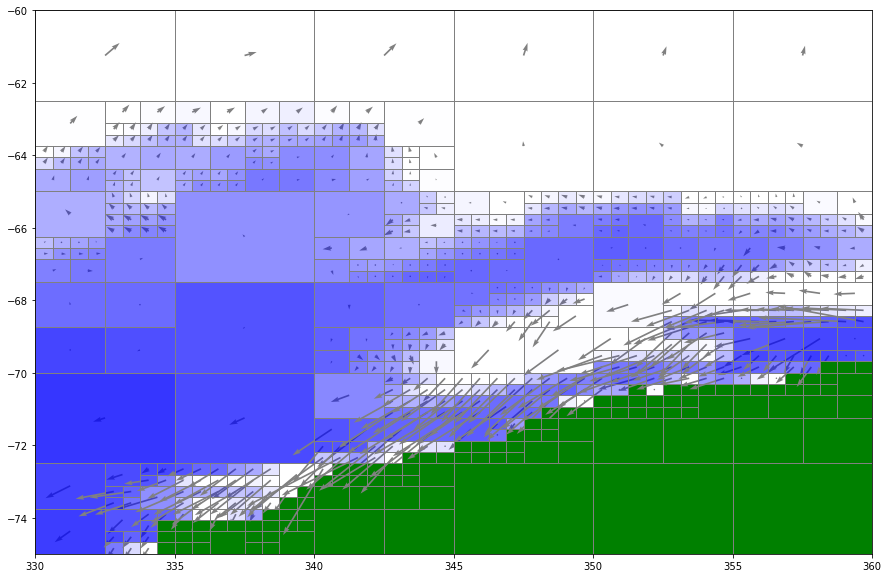

In [5]:
from RoutePlanner.Plot import PlotMesh, OptimisedPaths
PlotMesh(mesh)

# Optimisation

In [6]:
from RoutePlanner.Optimisation import TravelTime
from RoutePlanner.Function import NewtonianDistance, SmoothedNewtonianDistance
OptInfo = {}
OptInfo['WayPoints']            = pd.read_csv('./resources/WayPoints_ICe.csv') 
OptInfo['VehicleInfo']          = {}
OptInfo['VehicleInfo']['Speed'] = 26.3*(1000/(60*60))

In [7]:
TT  = TravelTime(mesh,OptInfo)

=== Processing Waypoint = MaudRise ===
=== Processing Waypoint = Brunt ===
=== Processing Waypoint = WP ===


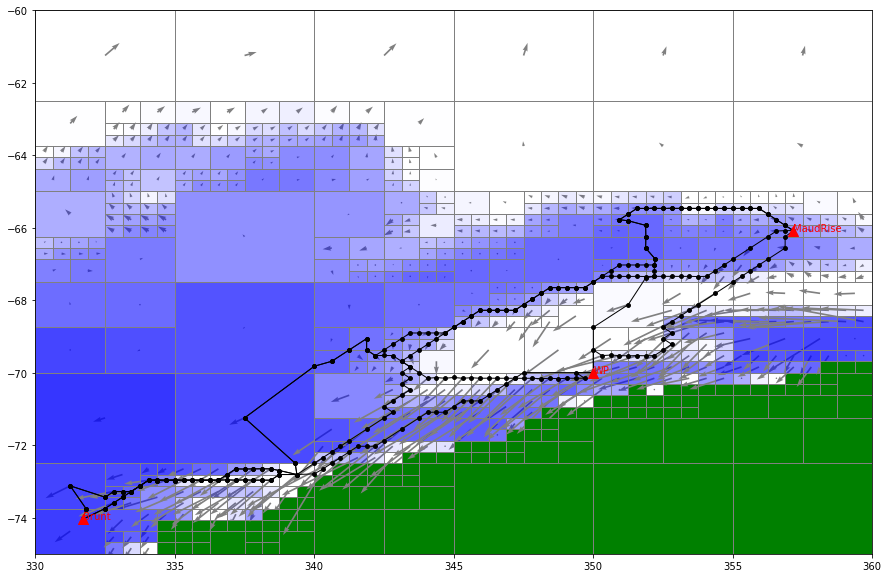

In [8]:
TT.Dijkstra(verbrose=True)
OptimisedPaths(mesh,TT,TT.Paths)

Brunt WP


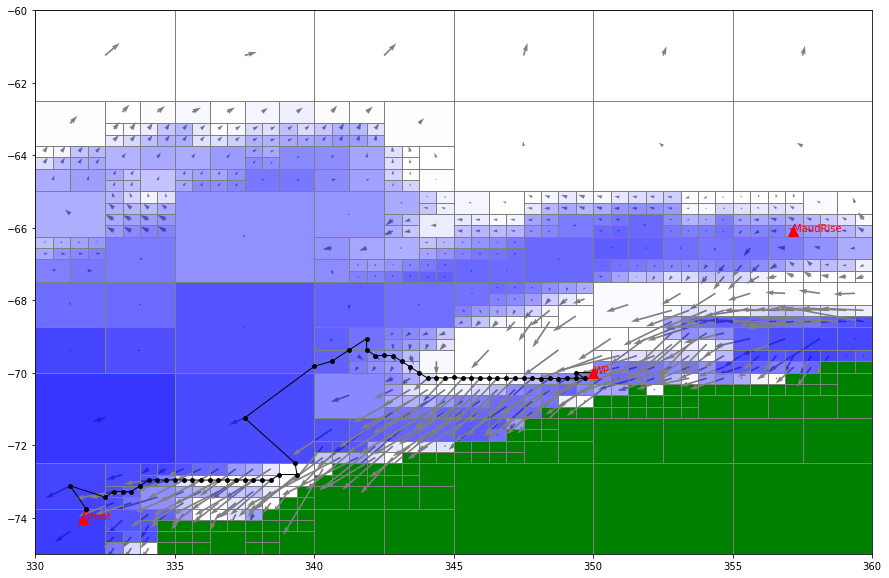

In [11]:
indx = 3

OptimisedPaths(mesh,TT,[TT.Paths[indx]])
print(TT.Paths[indx]['from'],TT.Paths[indx]['to'])